Base on the work on the EDA, we can work on prediction to recommend actions to the company management.

Here are some extra information to take into account.

## Summary of Problem Statement
### ❓ How could Olist improve its profit ❓

**P&L Rules**<br>
Revenues<br>
Sales fees: Olist takes a 10% cut on the product price (excl. freight) of each order delivered<br>
Subscription fees: Olist charges 80 BRL by month per seller


**IT costs** <br>
Olist's total cumulated IT Costs scale with the square root of the total number of sellers that have ever joined the platform, as well as with the square root of the total cumulated number of items that were ever sold.<br>
<br>
𝐼𝑇_𝑐𝑜𝑠𝑡𝑠=𝛼∗$\sqrt{𝑛\_𝑠𝑒𝑙𝑙𝑒𝑟𝑠}$+𝛽∗$\sqrt{𝑛\_𝑖𝑡𝑒𝑚𝑠}$<br>
 
Olist's data team gave us the following values for these scaling parameters:<br>

𝛼=3157.27
 
𝛽=978.23<br>
 <br>
💡 Both the number of sellers to manage and the number of sales transaction are costly for IT systems.<br>
💡 Yet square roots reflect scale-effects: IT-system are often more efficient as they grow bigger.<br>
💡 Alpha > Beta means that Olist has a lower IT Cost with few sellers selling a lot of items rather than the opposite<br>

with 1000 sellers and a total of 100 items sold, the total IT cost accumulates to 109,624 BRL<br>
with 100 sellers and a total of 1000 items sold, the total IT cost accumulates to 62,507 BRL<br>
Finally, The IT department also told you that since the birth of the marketplace, cumulated IT costs have amounted to 500,000 BRL.


## Actual situation

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

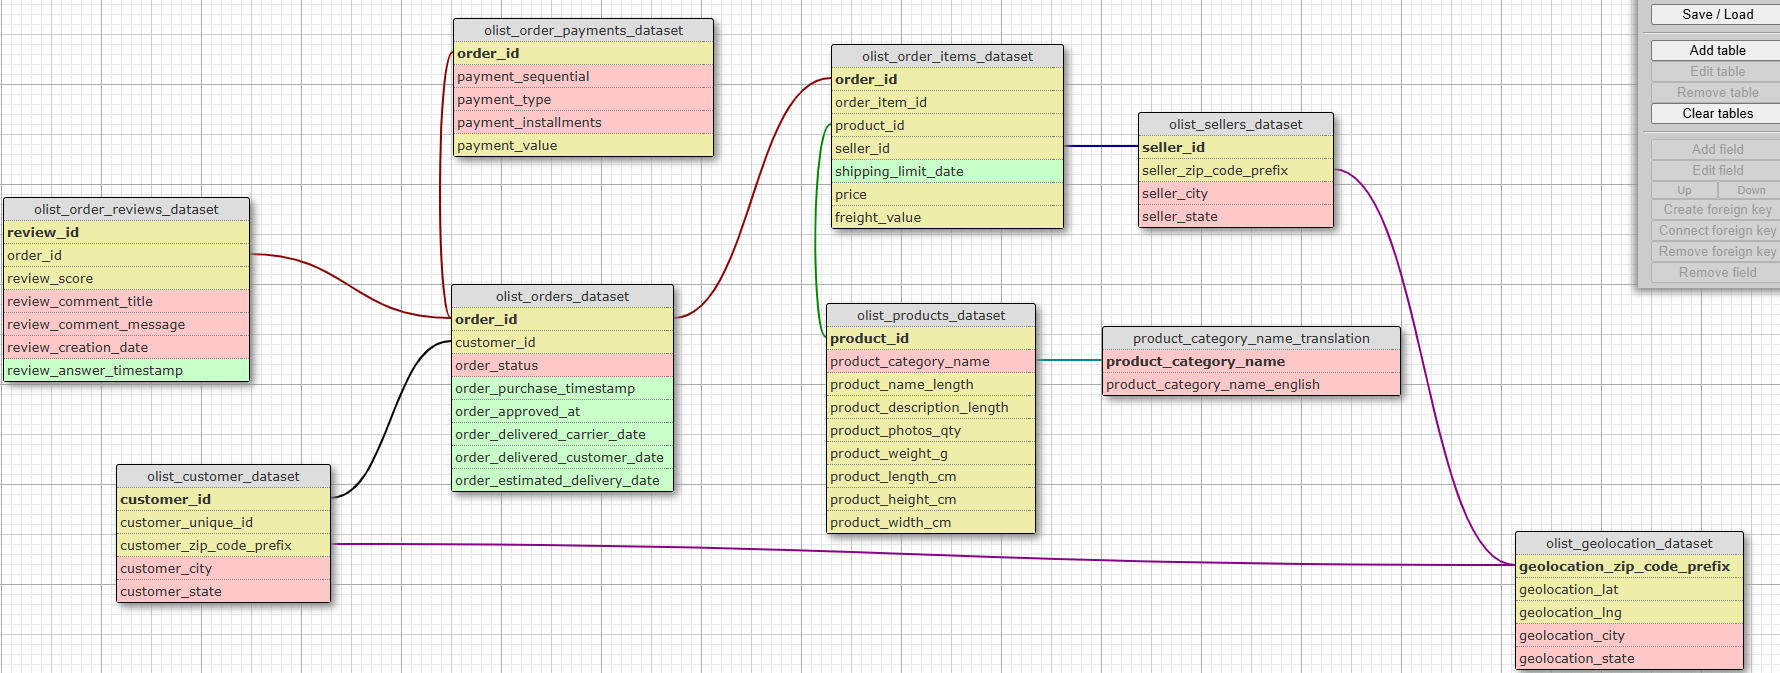

In [2]:
Image('Image/olist_erd_details.png')

In [ ]:
# Load CSVs
orders = pd.read_csv('data/olist_orders_dataset.csv')
customers = pd.read_csv('data/olist_customers_dataset.csv')
reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
translation = pd.read_csv('data/product_category_name_translation.csv')
sellers = pd.read_csv('data/olist_sellers_dataset.csv')

# Merge datasets 
data = orders.merge(customers, on='customer_id', how='left') \
    .merge(order_items, on='order_id', how='left') \
    .merge(sellers, on='seller_id', how='left') \
    .merge(reviews, on='order_id', how='left') \
    .merge(products, on='product_id', how='left') \
    .merge(translation, on='product_category_name', how='left')

            
# Cleaning
# Drop columns not inherently related to the objectives, especially in the context of EDA
# drop columns with too many missing values

data = data.drop(columns=['order_delivered_carrier_date','order_approved_at', 'review_id','review_comment_title', 
                         'review_answer_timestamp', 'product_name_lenght', 'product_description_lenght',
                         'product_photos_qty','product_weight_g', 'product_length_cm', 'product_height_cm','product_width_cm',
                         'product_category_name', 'customer_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 
                         'order_estimated_delivery_date','seller_city','seller_zip_code_prefix', 'seller_state','customer_city'])